# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/revph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [27]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [28]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [30]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [37]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound",  "Negative", "Neutral","Positive","Text"]
btc_df = btc_df[cols]

btc_df.head()


,Compound,Negative,Neutral,Positive,Text
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...
4,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...


In [118]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound",  "Negative", "Neutral","Positive","Text"]
eth_df = eth_df[cols]

eth_df.head()


,Compound,Negative,Neutral,Positive,Text
0,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...
1,0.7506,0.000,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.000,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [40]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.110834,0.026940,0.917330,0.055740
std,0.328843,0.045122,0.084166,0.065897
min,-0.680800,0.000000,0.662000,0.000000
25%,0.000000,0.000000,0.859250,0.000000
50%,0.000000,0.000000,0.931000,0.048000
75%,0.323650,0.055500,1.000000,0.097000
max,0.817600,0.219000,1.000000,0.269000


In [43]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.100706,0.023570,0.927410,0.049030
std,0.338604,0.044566,0.077769,0.065169
min,-0.918600,0.000000,0.694000,0.000000
25%,0.000000,0.000000,0.882250,0.000000
50%,0.000000,0.000000,0.942500,0.000000
75%,0.323650,0.042000,1.000000,0.077500
max,0.827100,0.289000,1.000000,0.256000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [95]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [113]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [114]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [115]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df['Text'].apply(tokenizer)
btc_df.head()


,Compound,Negative,Neutral,Positive,Text,tokens
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[teslas, relationship, bitcoin, dalliance, acc..."
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...,"[cryptocurrency, price, continued, tumble, fri..."
4,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, ha, seen, momentous,..."


In [119]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df['Text'].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
1,0.7506,0.000,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
2,0.0258,0.000,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, businessbitcoin, price, conti..."
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [120]:
from collections import Counter
from nltk import ngrams

In [154]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_string = ' '.join(btc_df.Text)
btc_processed = tokenizer(btc_string)
btc_bigrams = ngrams(btc_processed, n=2)
btc_top_10 = dict(Counter(btc_bigrams).most_common(10))
pd.DataFrame(list(btc_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,"(char, reuters)",18
1,"(virtual, currency)",16
2,"(illustration, taken)",14
3,"(representation, virtual)",12
4,"(currency, bitcoin)",12
5,"(seen, front)",11
6,"(front, stock)",11
7,"(stock, graph)",11
8,"(graph, illustration)",11
9,"(bitcoin, seen)",9


In [156]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_string = ' '.join(eth_df.Text)
eth_processed = tokenizer(eth_string)
eth_bigrams = ngrams(eth_processed, n=2)
eth_top_10 = dict(Counter(eth_bigrams).most_common(10))
pd.DataFrame(list(eth_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,"(virtual, currency)",11
1,"(illustration, taken)",11
2,"(char, reuters)",10
3,"(representation, virtual)",10
4,"(seen, front)",9
5,"(front, stock)",9
6,"(stock, graph)",9
7,"(graph, illustration)",9
8,"(digital, currency)",9
9,"(char, april)",9


In [161]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [172]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
pd.DataFrame(token_count(eth_processed), columns=['word', 'count'])

,word,count
0,char,100
1,bitcoin,33
2,cryptocurrency,31
3,ethereum,30
4,ha,25
5,currency,24
6,reuters,23
7,digital,17
8,april,15
9,high,14


In [173]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
pd.DataFrame(token_count(btc_processed), columns=['word', 'count'])

,word,count
0,char,100
1,bitcoin,76
2,reuters,34
3,cryptocurrency,28
4,currency,23
5,seen,20
6,ha,19
7,stock,19
8,virtual,16
9,inc,15


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [174]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

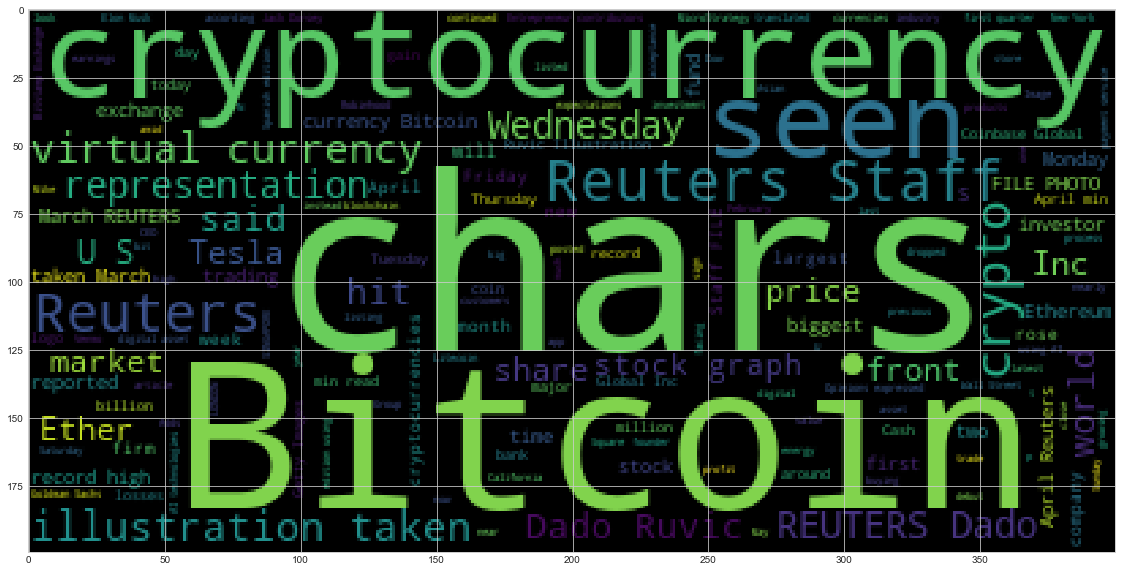

In [176]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

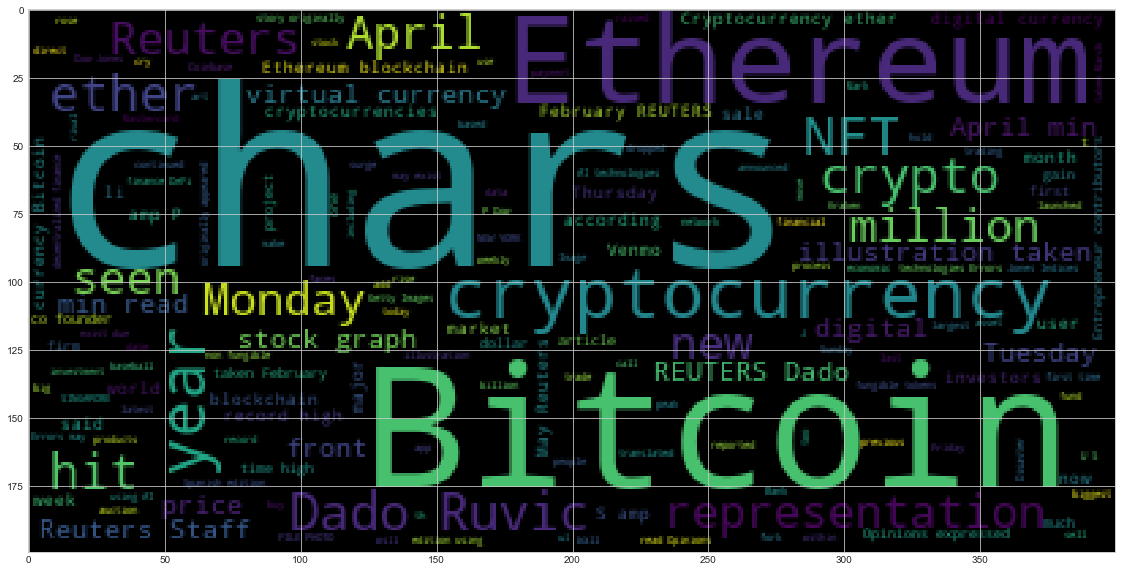

In [177]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [178]:
import spacy
from spacy import displacy

In [179]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [180]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!


In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---